In [1]:
import os
os.chdir('/workspaces/kornia/')
print(os.getcwd())

/workspaces/kornia


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch

from kornia.geometry.nerf.rays import RandomRaySampler, UniformRaySampler, cameras_for_ids, sample_lengths
from test.geometry.nerf.test_rays import create_camera_dimensions, create_four_cameras, sample_ray_points

In [3]:
heights, widths, num_rays = create_camera_dimensions('cpu', int)
heights = torch.div(heights, 10).int()
widths = torch.div(widths, 10).int()
print(heights, widths, num_rays)

sampler = RandomRaySampler(1, 1)
points_2d_camera = sampler.sample_points_2d(heights, widths, num_rays)

tensor([20, 20, 20, 10, 10], dtype=torch.int32) tensor([30, 30, 30, 40, 40], dtype=torch.int32) tensor([10, 10, 10, 15, 15])


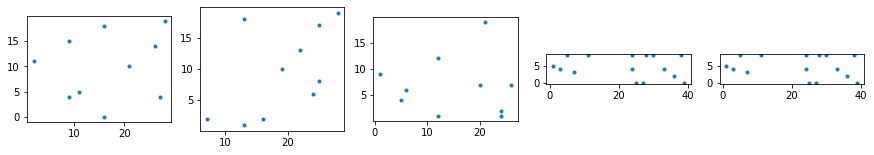

In [4]:
plt.figure(figsize=(15, 15))

ax = plt.subplot(151)
plt.plot(points_2d_camera[10].points_2d[0, :, 0], points_2d_camera[10].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(152)
plt.plot(points_2d_camera[10].points_2d[1, :, 0], points_2d_camera[10].points_2d[1, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(153)
plt.plot(points_2d_camera[10].points_2d[2, :, 0], points_2d_camera[10].points_2d[2, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(154)
plt.plot(points_2d_camera[15].points_2d[0, :, 0], points_2d_camera[15].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(155)
plt.plot(points_2d_camera[15].points_2d[0, :, 0], points_2d_camera[15].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

In [5]:
uniform_sampler = UniformRaySampler(1, 1)
points_2d_camera = uniform_sampler.sample_points_2d(heights, widths)

/usr/local/lib/python3.8/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


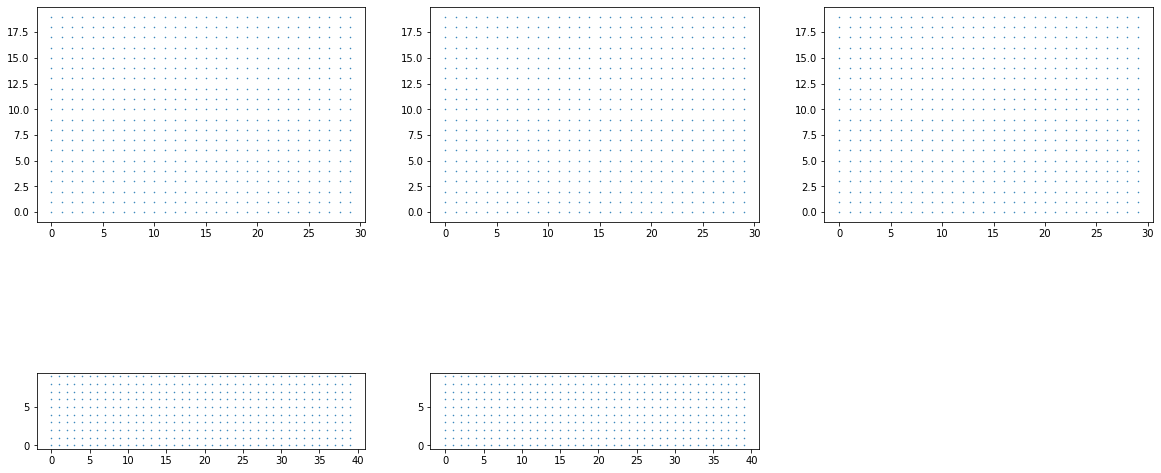

In [6]:
plt.figure(figsize=(20, 10))

ax = plt.subplot(231)
plt.plot(points_2d_camera[600].points_2d[0, :, 0], points_2d_camera[600].points_2d[0, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(232)
plt.plot(points_2d_camera[600].points_2d[1, :, 0], points_2d_camera[600].points_2d[1, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(233)
plt.plot(points_2d_camera[600].points_2d[2, :, 0], points_2d_camera[600].points_2d[2, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(234)
plt.plot(points_2d_camera[400].points_2d[0, :, 0], points_2d_camera[400].points_2d[0, :, 1], '.', markersize=1)
ax.set_aspect('equal')

ax = plt.subplot(235)
plt.plot(points_2d_camera[400].points_2d[1, :, 0], points_2d_camera[400].points_2d[1, :, 1], '.', markersize=1)
ax.set_aspect('equal')

# Going 3D

In [7]:
cameras = create_four_cameras('cpu', torch.float32)
uniform_sampler_four_cameras = UniformRaySampler(1, 11)
points_2d_four_cameras = uniform_sampler_four_cameras.sample_points_2d(cameras.height, cameras.width)

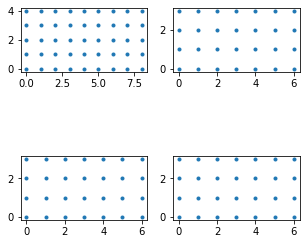

In [8]:
plt.figure(figsize=(5, 5))

ax = plt.subplot(221)
plt.plot(points_2d_four_cameras[45].points_2d[0, :, 0], points_2d_four_cameras[45].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(222)
plt.plot(points_2d_four_cameras[28].points_2d[0, :, 0], points_2d_four_cameras[28].points_2d[0, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(223)
plt.plot(points_2d_four_cameras[28].points_2d[1, :, 0], points_2d_four_cameras[28].points_2d[1, :, 1], '.')
ax.set_aspect('equal')

ax = plt.subplot(224)
plt.plot(points_2d_four_cameras[28].points_2d[2, :, 0], points_2d_four_cameras[28].points_2d[2, :, 1], '.')
ax.set_aspect('equal')


In [9]:
cameras_28 = cameras_for_ids(cameras, points_2d_four_cameras[28].camera_ids)
points_3d_28 = cameras_28.unproject(points_2d_four_cameras[28].points_2d, 1)
cameras_45 = cameras_for_ids(cameras, points_2d_four_cameras[45].camera_ids)
points_3d_45 = cameras_45.unproject(points_2d_four_cameras[45].points_2d, 1)

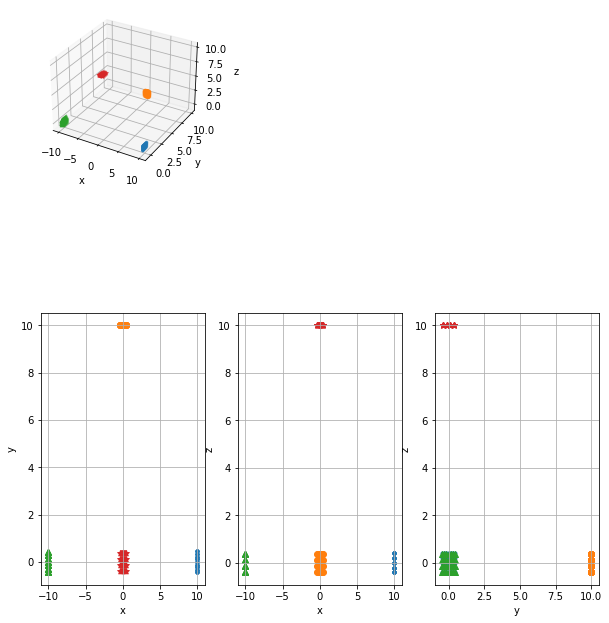

In [10]:
fig = plt.figure(figsize=(10, 10))
subfigs = fig.subfigures(2, 1, hspace=0.07)

ax1 = subfigs[0].add_subplot(131, projection='3d')

ax = subfigs[1].subplots(1, 3)
ax2 = ax[0]
ax3 = ax[1]
ax4 = ax[2]

for j, m in enumerate(['.', 'o', '^', '*']):
    if j == 0:
        points_3d = points_3d_45
        i = j
    else:
        points_3d = points_3d_28
        i = j - 1
    ax1.scatter(points_3d[i, :, 0], points_3d[i, :, 1], points_3d[i, :, 2], marker=m)
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')

    ax2.scatter(points_3d[i, :, 0], points_3d[i, :, 1], marker=m)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.grid('on')

    ax3.scatter(points_3d[i, :, 0], points_3d[i, :, 2], marker=m)
    ax3.set_xlabel('x')
    ax3.set_ylabel('z')
    ax3.grid('on')

    ax4.scatter(points_3d[i, :, 1], points_3d[i, :, 2], marker=m)
    ax4.set_xlabel('y')
    ax4.set_ylabel('z')
    ax4.grid('on')

In [11]:
uniform_sampler_four_cameras.calc_ray_params(cameras)
lengths = sample_lengths(uniform_sampler_four_cameras.origins.shape[0], 11, irregular=True)
points_3d = sample_ray_points(
    uniform_sampler_four_cameras.origins,
    uniform_sampler_four_cameras.directions,
    lengths,
)
print(points_3d.shape, lengths.min(), lengths.max())

torch.Size([129, 11, 3]) tensor(0.0022) tensor(0.9987)


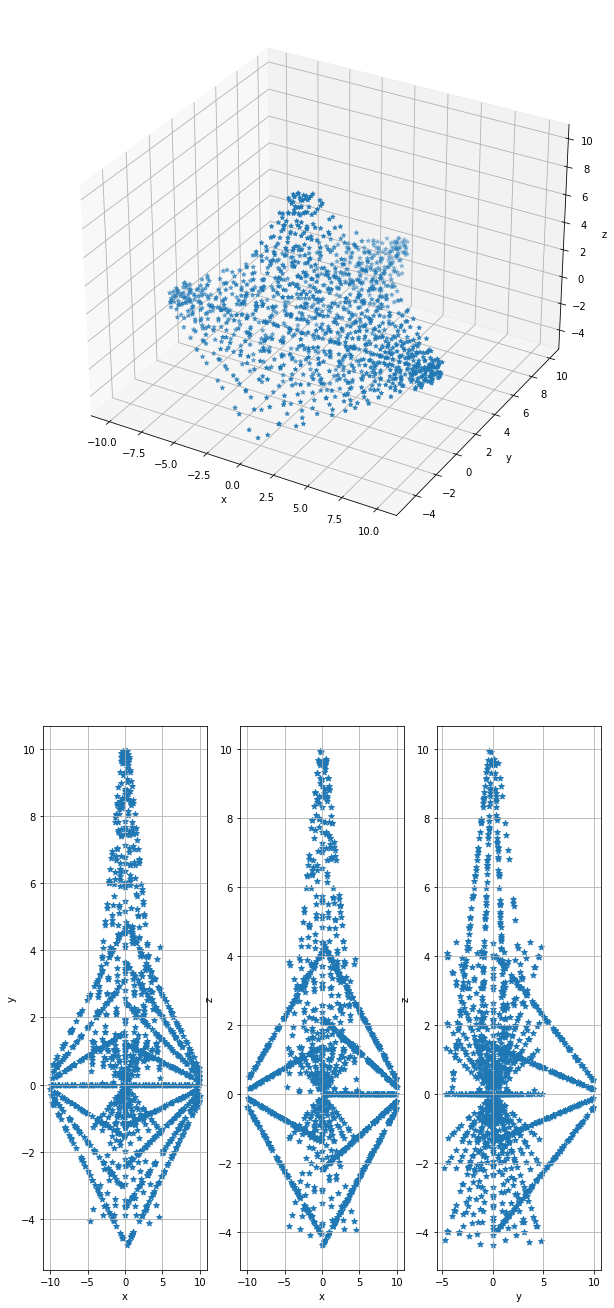

In [12]:
fig = plt.figure(figsize=(10, 20))
subfigs = fig.subfigures(2, 1, hspace=0.07)

ax1 = subfigs[0].add_subplot(projection='3d')

ax = subfigs[1].subplots(1, 3)
ax2 = ax[0]
ax3 = ax[1]
ax4 = ax[2]

ray_range = range(0, 3 * 28 + 45)

ax1.scatter(points_3d[ray_range, :, 0], points_3d[ray_range, :, 1], points_3d[ray_range, :, 2], marker=m)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

ax2.scatter(points_3d[ray_range, :, 0], points_3d[ray_range, :, 1], marker=m)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.grid('on')

ax3.scatter(points_3d[ray_range, :, 0], points_3d[ray_range, :, 2], marker=m)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.grid('on')

ax4.scatter(points_3d[ray_range, :, 1], points_3d[ray_range, :, 2], marker=m)
ax4.set_xlabel('y')
ax4.set_ylabel('z')
ax4.grid('on')

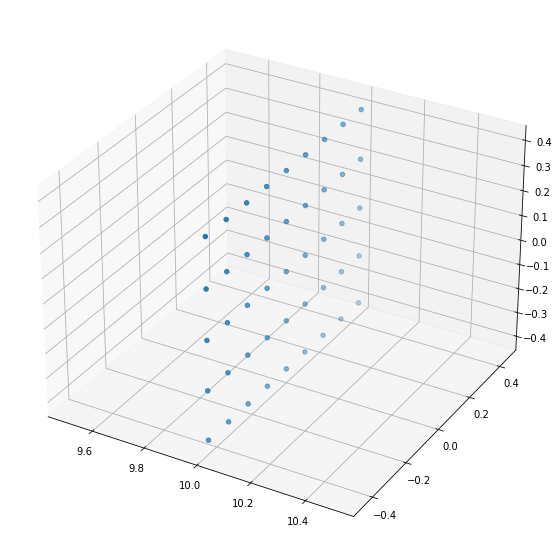

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(uniform_sampler_four_cameras.origins[:45, 0], uniform_sampler_four_cameras.origins[:45, 1], 
           uniform_sampler_four_cameras.origins[:45, 2])
